In [1]:
!pip install import-ipynb
import import_ipynb

In [2]:
# import import_mpii
# activities_set = import_mpii.activities_set
#
# train_loader =  import_mpii.train_loader
# val_loader = import_mpii.val_loader
# test_loader = import_mpii.test_loader
# label_encoder = import_mpii.label_encoder
# num_classes = import_mpii.num_classes

I: 0. Filename ./content/pushups/images?q=tbn:ANd9GcTipRg3kgcAKY1Tkkv3-DdWU3ieLf1D2Ufbgg&s act Name: ['down']
I: 1. Filename ./content/pushups/images?q=tbn:ANd9GcSrq5Rpn32O1LrxtdJ0XHVEeAycjYnD5I1U1Q&s act Name: ['down']
I: 2. Filename ./content/pushups/images?q=tbn:ANd9GcQ1zk-gZtJr_7EKR-lj7Sxbrss-IsFUwFR45A&s act Name: ['down']
I: 3. Filename ./content/pushups/images?q=tbn:ANd9GcStvUucv9ug4dkD0212d969hHxxtN6dmv1ABw&s act Name: ['down']
I: 4. Filename ./content/pushups/images?q=tbn:ANd9GcSFcv_uArv-n5jKvs9B3GEmTSU0EuudGQKaPg&s act Name: ['down']
I: 5. Filename ./content/pushups/images?q=tbn:ANd9GcQSEDvfeLHdYfuizjS297D7Gn588-uhO4kdAA&s act Name: ['down']
I: 6. Filename ./content/pushups/DSC_0526.JPG act Name: ['down']
I: 7. Filename ./content/pushups/images?q=tbn:ANd9GcTLfIXJxE7iGQ_SJty50yNoHqQfdv1vETz-qA&s act Name: ['down']
I: 8. Filename ./content/pushups/images?q=tbn:ANd9GcRaofQsvW9_l2BcEp89U0Etet77Pa_8ja5RlQ&s act Name: ['down']
I: 9. Filename ./content/pushups/images?q=tbn:ANd9GcQIw

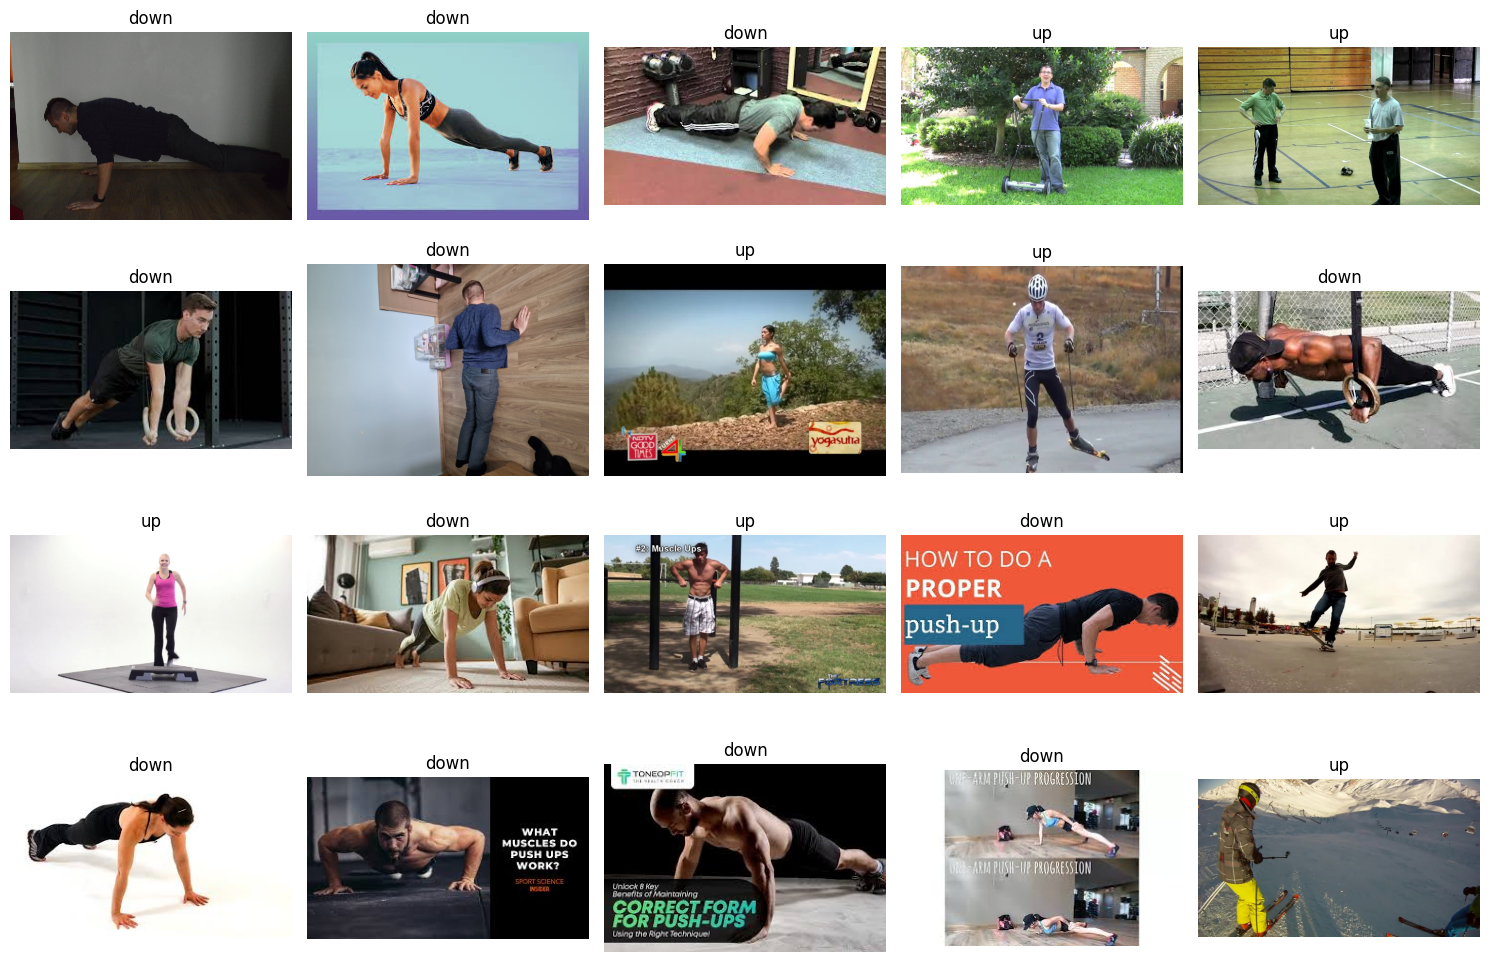

Category: down, Count: 388
Category: up, Count: 522


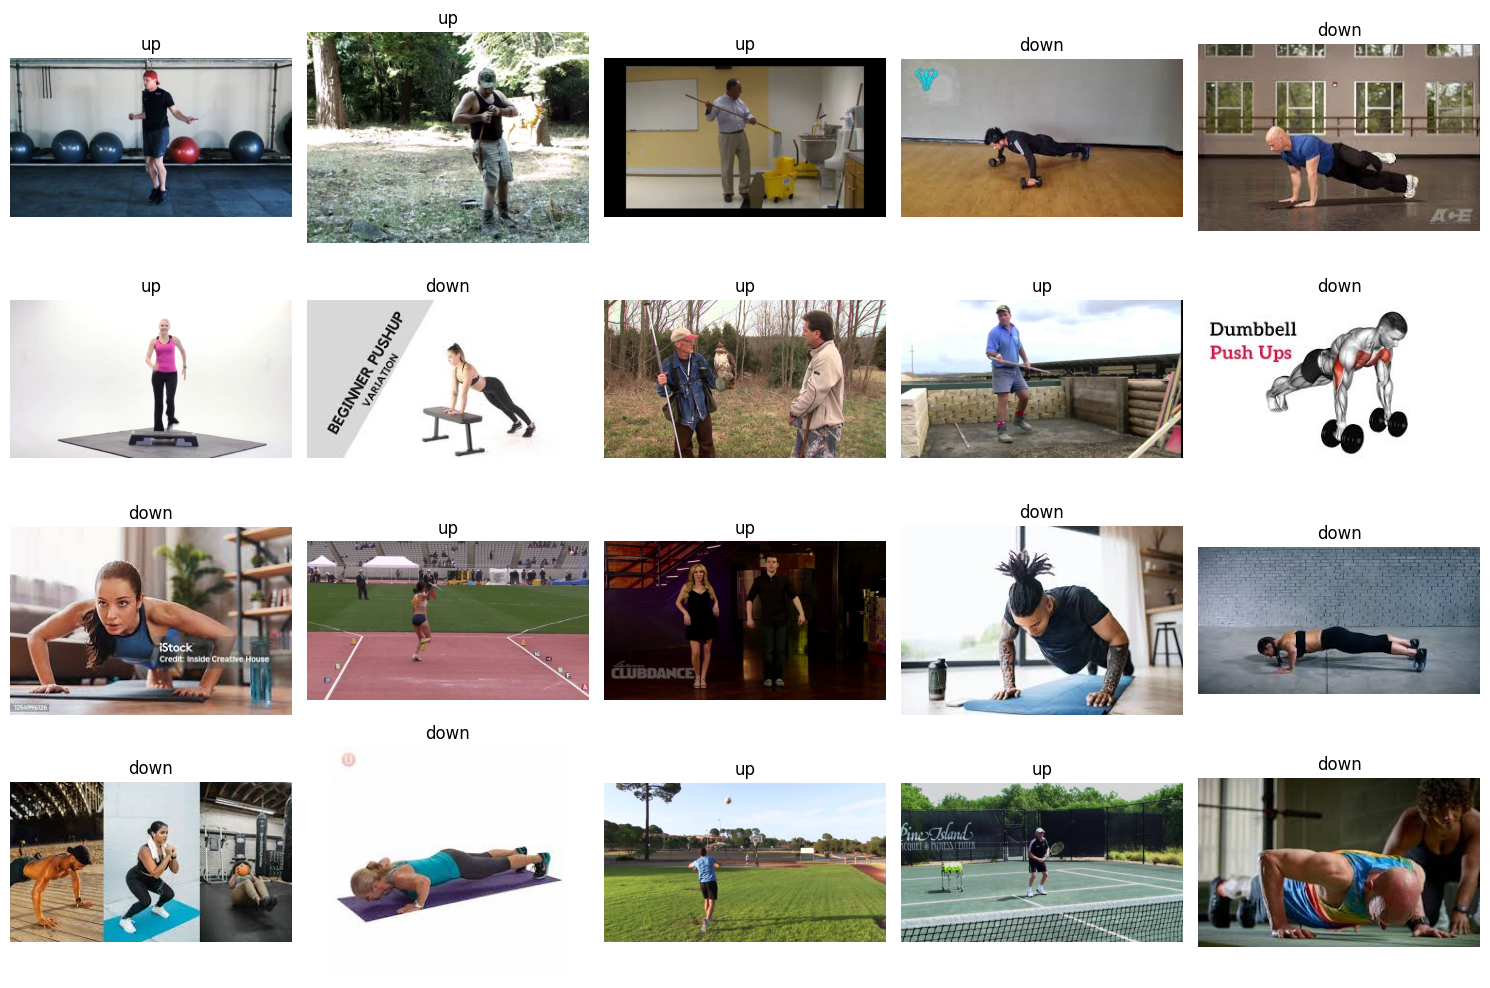

Filtered dataset size: 910
[('./content/standing/021018510.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcQ-zzyIxhul43LLhg558sDqra33N2rKIBrs1A&s', ['down']), ('./content/standing/004012879.jpg', ['up']), ('./content/standing/015752733.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcQ1UdekrpCCp8tvLmZ8_RJTJlnmrAT9uUEB1r6MSNLG&s=0', ['down']), ('./content/standing/000245459.jpg', ['up']), ('./content/standing/20250430_141044.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcTbOutJBeKBP5Fd_ePowswBMkfrHVitzdJoLA&s', ['down']), ('./content/pushups/images?q=tbn:ANd9GcSIb65ADThGbN_CXqx5ynYrfE4PBZnuDpAVkw&s', ['down']), ('./content/standing/004836271.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcT6giOSxfcwtTSKgizZCg3sjcTp_H8kbxEEuQ&s', ['down']), ('./content/standing/014874151.jpg', ['up']), ('./content/standing/007660291.jpg', ['up']), ('./content/standing/010280856.jpg', ['up']), ('./content/standing/000577066.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcR_-Z

In [3]:
import import_selected
activities_set = import_selected.activities_set

train_loader =  import_selected.train_loader
val_loader = import_selected.val_loader
test_loader = import_selected.test_loader
label_encoder = import_selected.label_encoder
num_classes = import_selected.num_classes

In [4]:
# import import_coco
#
# train_loader =  import_coco.train_loader
# val_loader = import_coco.val_loader
# test_loader = None

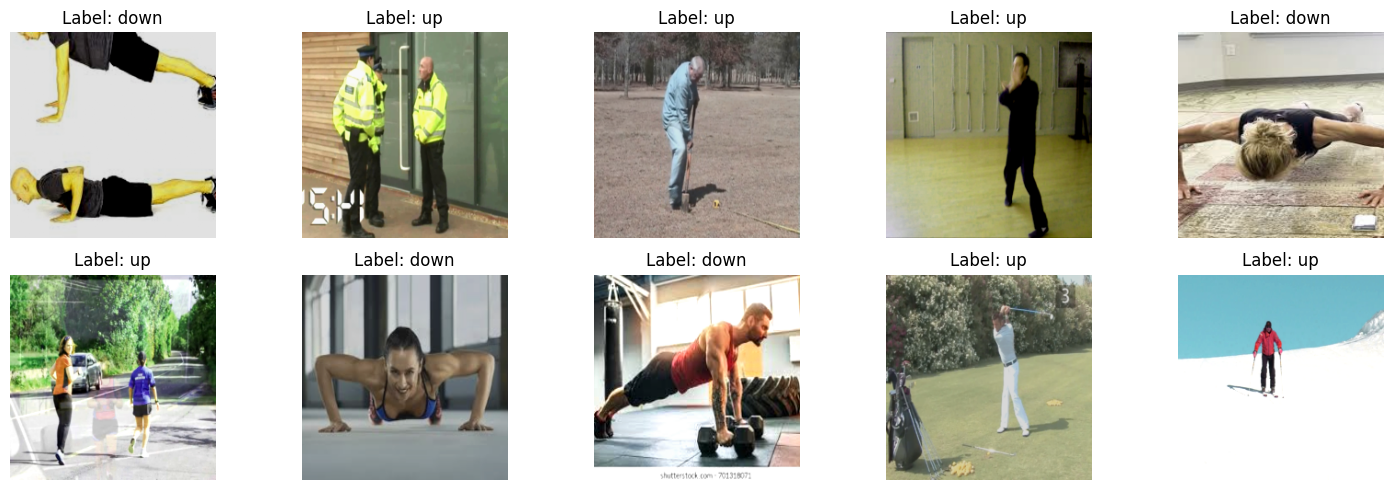

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Function to visualize 10 images with labels
def visualize_images_with_labels(train_loader, label_encoder):
    # Get a batch of data
    data_iter = iter(train_loader)
    images, labels = next(data_iter)

    # Reverse normalization for visualization
    inv_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    images = [inv_normalize(img).permute(1, 2, 0).numpy() for img in images[:10]]

    # Plot 10 images with labels
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {label_encoder.inverse_transform([labels[i].item()])[0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_images_with_labels(train_loader, import_selected.label_encoder)

In [6]:
import torch
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

Using device: cuda


In [12]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



def train_model(train_loader, val_loader, test_loader, model_class, epochs=5):
    # Initialize the model, loss function, and optimizer
    model = model_class(2)
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()

    #optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.0001)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_acc = 0

    # Training loop
    for epoch in range(epochs):
        model.train()
        print("training... 💪")
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

            if batch_idx % 10 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()
        print("evaluating... !!!")
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(DEVICE), target.to(DEVICE)
                outputs = model(data)
                loss = criterion(outputs, target)
                val_loss += loss.item()

                predicted = torch.argmax(outputs, dim=1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        train_losses.append(val_loss)

        val_loss /= len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = model.state_dict()
            torch.save(best_weights, "best.pt")
            print(f"Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾")

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {running_loss / len(train_loader):.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}%, Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.4f}%  Best so far: {best_val_acc:.4f}%")

    # Test evaluation
    print("\nEvaluating on test dataset...")
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            outputs = model(data)
            loss = criterion(outputs, target)
            test_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses[1:], label='Training Loss')
    plt.plot(val_losses[1:], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

    return best_val_acc, model

training... 💪
Epoch [1/50], Batch [1/23], Loss: 0.7736
Epoch [1/50], Batch [11/23], Loss: 0.6061
Epoch [1/50], Batch [21/23], Loss: 0.6738
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 1/50, Train Loss: 0.9692, Train Accuracy: 59.4780%, Validation Loss: 17.5882, Validation Accuracy: 52.7473%  Best so far: 52.7473%
training... 💪
Epoch [2/50], Batch [1/23], Loss: 0.6441
Epoch [2/50], Batch [11/23], Loss: 0.5860
Epoch [2/50], Batch [21/23], Loss: 0.6308
evaluating... !!!
Saving best model...💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾💾
Epoch 2/50, Train Loss: 0.6608, Train Accuracy: 64.4231%, Validation Loss: 0.7822, Validation Accuracy: 62.6374%  Best so far: 62.6374%
training... 💪
Epoch [3/50], Batch [1/23], Loss: 0.6276
Epoch [3/50], Batch [11/23], Loss: 0.6126
Epoch [3/50], Batch [21/23], Loss: 0.7463
evaluating... !!!
Epoch 3/50, Train Loss: 0.6227, Train Accuracy: 66.2088%, Validation Loss: 0.6473, Validation Accuracy: 58.2418%  Best so far: 62.6374%
training... 💪
Epoch [4/50], Batch [1/2

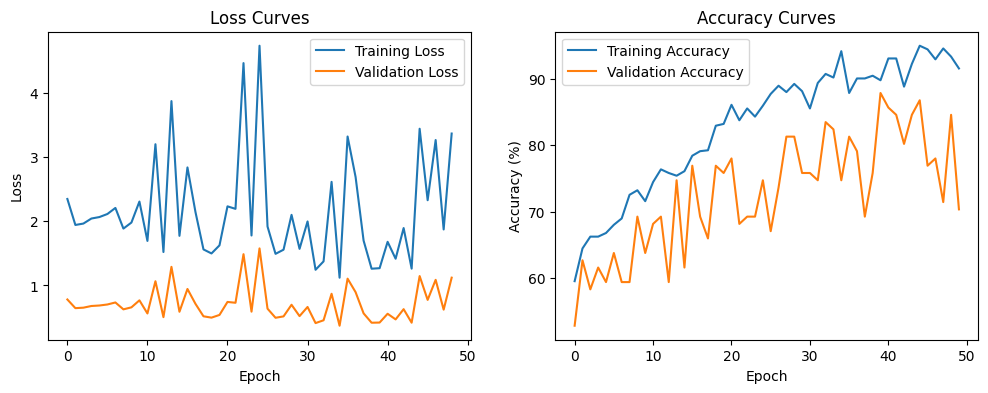

In [13]:
import torch
from models import BiTLikeModel
torch.cuda.empty_cache()
best_val_acc, model = train_model(train_loader, val_loader, test_loader, model_class=BiTLikeModel, epochs=50)

In [10]:
from inferring import test_image, load_model, predict_image_class

#testuojam
# atsispaudzia
image_path = 'test_data/ats1.jpeg'
test_image(model, image_path)
image_path = 'test_data/ats2.jpeg'
test_image(model, image_path)

print("=======================")

# stovi
image_path = 'test_data/stov1.jpg'
test_image(model, image_path)
image_path = 'test_data/stov2.jpg'
test_image(model, image_path)


Using device: cuda
output: tensor([[-0.0390,  0.1938]], device='cuda:0')
probabilities: tensor([[0.4420, 0.5580]], device='cuda:0')
Predicted class index: 1, Probability: 0.5580
Using device: cuda
output: tensor([[ 3.7574, -3.7933]], device='cuda:0')
probabilities: tensor([[9.9947e-01, 5.2546e-04]], device='cuda:0')
Predicted class index: 0, Probability: 0.9995
Using device: cuda
output: tensor([[-4.5292,  4.6992]], device='cuda:0')
probabilities: tensor([[9.8200e-05, 9.9990e-01]], device='cuda:0')
Predicted class index: 1, Probability: 0.9999
Using device: cuda
output: tensor([[-1.7499,  1.7760]], device='cuda:0')
probabilities: tensor([[0.0286, 0.9714]], device='cuda:0')
Predicted class index: 1, Probability: 0.9714


(1, 0.9714162945747375)

In [11]:
#testuojam su savo duomenimis

# atsispaudzia
test_image(model, "content/pushups/DSC_0535.JPG")
test_image(model, "content/pushups/DSC_0533.JPG")

print("=======================")

# stovi
test_image(model, "content/standing/20250430_141003.jpg")
test_image(model, "content/standing/20250430_141036.jpg")

Using device: cuda
output: tensor([[-1.0244,  1.1449]], device='cuda:0')
probabilities: tensor([[0.1025, 0.8975]], device='cuda:0')
Predicted class index: 1, Probability: 0.8975
Using device: cuda
output: tensor([[ 5.3628, -5.1930]], device='cuda:0')
probabilities: tensor([[9.9997e-01, 2.6042e-05]], device='cuda:0')
Predicted class index: 0, Probability: 1.0000
Using device: cuda
output: tensor([[-0.6946,  0.6661]], device='cuda:0')
probabilities: tensor([[0.2041, 0.7959]], device='cuda:0')
Predicted class index: 1, Probability: 0.7959
Using device: cuda
output: tensor([[-0.3533,  0.3995]], device='cuda:0')
probabilities: tensor([[0.3202, 0.6798]], device='cuda:0')
Predicted class index: 1, Probability: 0.6798


(1, 0.6797792315483093)